<a href="https://colab.research.google.com/github/MuhammadAfaan/Advanced-Stats_Labs/blob/main/Advanced_Stats_Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np                  # numpy: Used for numerical computations and array handling
import pandas as pd                 # pandas: A powerful data manipulation library, used to organize and display the frequency distribution.
import matplotlib.pyplot as plt     # matplotlib.pyplot: Used for creating plots or visualization.
import seaborn as sns               # seaborn: A statistical data visualization library based on matplotlib.
from scipy.stats import skew

In [ ]:
df = pd.read_csv('Task_1_Student_Data.csv')

In [ ]:
df.head(10)

,Student ID,Daily Screen Time,Monthly Pocket Money,Life Satisfaction
0,1,6.0,15000,MS
1,2,2.0,5000,VS
2,3,4.0,10000,VS
3,4,5.0,10000,VS
4,5,7.0,10000,MS
5,6,4.0,5000,VS
6,7,1.5,17000,VS
7,8,7.0,5000,MS
8,9,0.0,6500,CS
9,10,7.0,5500,NS


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Student ID            60 non-null     int64  
 1   Daily Screen Time     60 non-null     float64
 2   Monthly Pocket Money  60 non-null     int64  
 3   Life Satisfaction     60 non-null     object 
dtypes: float64(1), int64(2), object(1)
memory usage: 2.0+ KB


In [ ]:
# Initialize lists
num_cols = []
cat_cols = []

for col in df.columns:
    if col == 'Student ID':
        continue
    if pd.api.types.is_numeric_dtype(df[col]):
        num_cols.append(col)
    else:
        cat_cols.append(col)

# Print the result
print(f"Numerical Columns: {num_cols}")
print(f"Categorical Columns: {cat_cols}")

Numerical Columns: ['Daily Screen Time', 'Monthly Pocket Money']
Categorical Columns: ['Life Satisfaction']


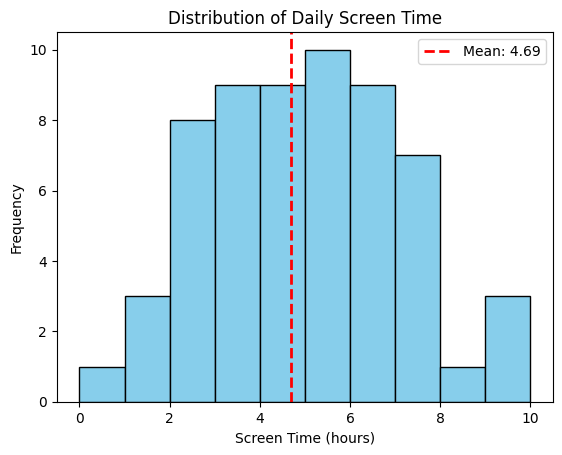

In [ ]:
#Daily Screen Time using histogram
mean_value = df['Daily Screen Time'].mean()
df['Daily Screen Time'].hist(bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Daily Screen Time')
plt.xlabel('Screen Time (hours)')
plt.ylabel('Frequency')
plt.grid(False)
plt.axvline(mean_value, color='red', linestyle='dashed', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.legend()
plt.show()

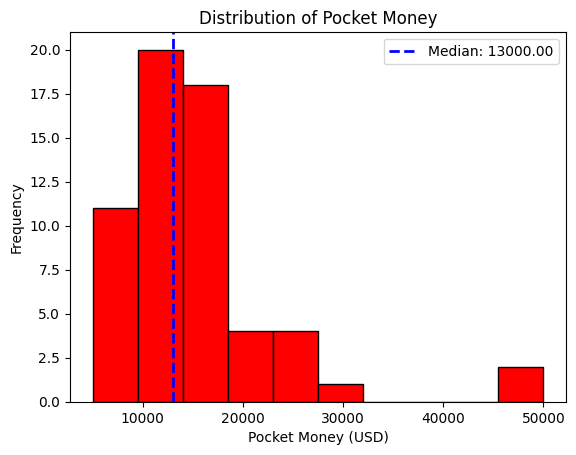

In [ ]:
# pocket money
median_value = df['Monthly Pocket Money'].median()
df['Monthly Pocket Money'].hist(bins=10, color='red', edgecolor='black')
plt.title('Distribution of Pocket Money')
plt.xlabel('Pocket Money (USD)')
plt.ylabel('Frequency')
plt.grid(False)
plt.axvline(median_value, color='blue', linestyle='dashed', linewidth=2, label=f'Median: {median_value:.2f}')
plt.legend()
plt.show()

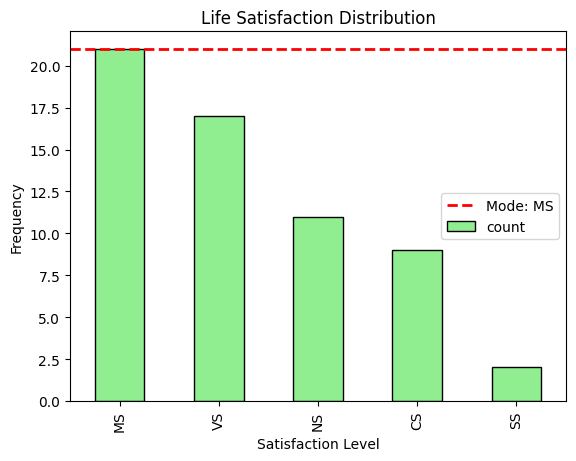

In [ ]:
#Bar chart because of catagorical
mode_value = df['Life Satisfaction'].mode()[0]
df['Life Satisfaction'].value_counts().plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Life Satisfaction Distribution')
plt.xlabel('Satisfaction Level')
plt.ylabel('Frequency')
plt.grid(False)
plt.axhline(df['Life Satisfaction'].value_counts().max(), color='red', linestyle='dashed', linewidth=2, label=f'Mode: {mode_value}')
plt.legend()
plt.show()

In [ ]:
# daily screen time
mean_screen_time = df['Daily Screen Time'].mean()
median_screen_time = df['Daily Screen Time'].median()
#  pocket monry
mean_pocket_money = df['Monthly Pocket Money'].mean()
median_pocket_money = df['Monthly Pocket Money'].median()
# satisfaction level
mode_satisfaction = df['Life Satisfaction'].mode()[0]

# display
print(f"Mean Screen Time: {mean_screen_time:.2f} hours")
print(f"Median Screen Time: {median_screen_time:.2f} hours")
print(f"Mean Pocket Money: ${mean_pocket_money:.2f}")
print(f"Median Pocket Money: ${median_pocket_money:.2f}")
print(f"Mode Life Satisfaction: {mode_satisfaction}")

Mean Screen Time: 4.69 hours
Median Screen Time: 4.75 hours
Mean Pocket Money: $14766.67
Median Pocket Money: $13000.00
Mode Life Satisfaction: MS


# **Task#2**

In [ ]:
df = pd.read_csv('Task_2_Feedback_Data.csv')

In [ ]:
df.head(10)

,Unnamed: 0,Excellent,Very Good,Good,Average,Poor
0,Question 1,20,16,7,1,0
1,Question 2,9,22,6,0,0
2,Question 3,11,20,7,0,0
3,Question 4,10,19,7,0,0
4,Question 5,8,21,5,0,0
5,Question 6,13,21,5,0,1
6,Question 7,11,21,6,0,0
7,Question 8,12,18,7,2,0
8,Question 9,13,21,5,0,0
9,Question 10,15,19,9,0,0


In [ ]:
df.rename(columns={'Unnamed: 0': 'Question'}, inplace=True)

In [ ]:
df.head(10)

,Question,Excellent,Very Good,Good,Average,Poor
0,Question 1,20,16,7,1,0
1,Question 2,9,22,6,0,0
2,Question 3,11,20,7,0,0
3,Question 4,10,19,7,0,0
4,Question 5,8,21,5,0,0
5,Question 6,13,21,5,0,1
6,Question 7,11,21,6,0,0
7,Question 8,12,18,7,2,0
8,Question 9,13,21,5,0,0
9,Question 10,15,19,9,0,0


In [ ]:
df['Weighted Sum'] = (
    df['Excellent'] * 5 +
    df['Very Good'] * 4 +
    df['Good'] * 3 +
    df['Average'] * 2 +
    df['Poor'] * 1
)

In [ ]:
df['Total Responses'] = df[['Excellent', 'Very Good', 'Good', 'Average', 'Poor']].sum(axis=1)

In [ ]:
df.head(10)

,Question,Excellent,Very Good,Good,Average,Poor,Weighted Sum,Total Responses
0,Question 1,20,16,7,1,0,187,44
1,Question 2,9,22,6,0,0,151,37
2,Question 3,11,20,7,0,0,156,38
3,Question 4,10,19,7,0,0,147,36
4,Question 5,8,21,5,0,0,139,34
5,Question 6,13,21,5,0,1,165,40
6,Question 7,11,21,6,0,0,157,38
7,Question 8,12,18,7,2,0,157,39
8,Question 9,13,21,5,0,0,164,39
9,Question 10,15,19,9,0,0,178,43


In [ ]:
df['Satisfaction Score'] = df['Weighted Sum'] / df['Total Responses']

In [ ]:
df['Satisfaction Score'].mean()

4.134261828673144

In [ ]:
df3 = pd.read_csv('Task_3_Accident_Data.csv')

In [ ]:
df3.head(50)

,Day,Place A,Place B,Place C
0,1,1,1,1
1,2,2,2,1
2,3,2,2,1
3,4,2,2,1
4,5,3,3,1
5,6,3,3,1
6,7,3,3,2
7,8,3,3,2
8,9,3,3,2
9,10,4,3,2


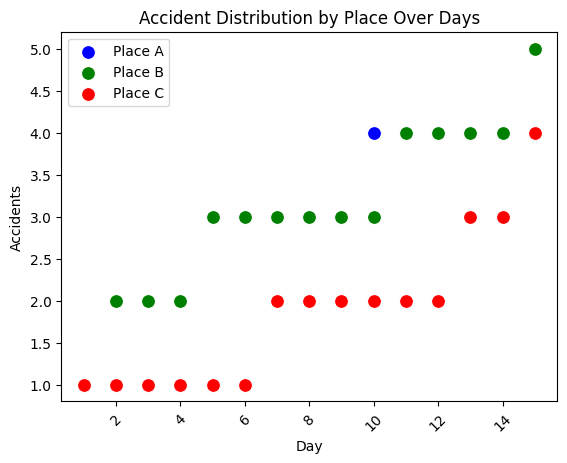

In [ ]:
sns.scatterplot(data=df, x='Day', y='Place A', label='Place A', color='blue', s=100, marker='o')
sns.scatterplot(data=df, x='Day', y='Place B', label='Place B', color='green', s=100, marker='o')
sns.scatterplot(data=df, x='Day', y='Place C', label='Place C', color='red', s=100, marker='o')

plt.title('Accident Distribution by Place Over Days')
plt.xlabel('Day')
plt.ylabel('Accidents')
plt.legend()
plt.xticks(rotation=45)
plt.show()

In [ ]:
place_a_skewness = skew(df['Place A'])
place_b_skewness = skew(df['Place B'])
place_c_skewness = skew(df['Place C'])

print(f"Skewness of accidents in Place A: {place_a_skewness}")
print(f"Skewness of accidents in Place B: {place_b_skewness}")
print(f"Skewness of accidents in Place C: {place_c_skewness}")

Skewness of accidents in Place A: -0.6320992448036591
Skewness of accidents in Place B: -0.133630620956213
Skewness of accidents in Place C: 0.8411481260663745


In [ ]:
place_a_risk = df['Place A'].sum()
place_b_risk = df['Place B'].sum()
place_c_risk = df['Place C'].sum()

print(f"Risk of accidents in Place A: {place_a_risk}")
print(f"Risk of accidents in Place B: {place_b_risk}")
print(f"Risk of accidents in Place C: {place_c_risk}")

Risk of accidents in Place A: 46
Risk of accidents in Place B: 46
Risk of accidents in Place C: 28


Place A and B have the highest Risks of Acident

# Tasks **4**

In [ ]:
df4 = pd.read_csv('Task_4_Grades_Data.csv')

In [ ]:
df4.head()

,Student ID,Study Time (hrs),Grade Weight
0,1,7,2
1,2,4,4
2,3,11,9
3,4,8,2
4,5,5,10


In [ ]:
# Compute the weighted mean study time
weighted_mean = (df4['Study Time (hrs)'] * df4['Grade Weight']).sum() / df4['Grade Weight'].sum()
print(f"Weighted Mean Study Time: {weighted_mean:.2f} hours")

Weighted Mean Study Time: 7.40 hours


# **Task 5**

In [ ]:
df5 = pd.read_csv('Task_5_Salaries_Data.csv')

In [ ]:
df5.head()

,Employee ID,Salaries (Thousands)
0,1,55
1,2,30
2,3,30
3,4,20
4,5,40


In [ ]:
salary_skewness = skew(df5['Salaries (Thousands)'])
print(f"Skewness of the salary distribution: {salary_skewness:.2f}")

Skewness of the salary distribution: 1.18


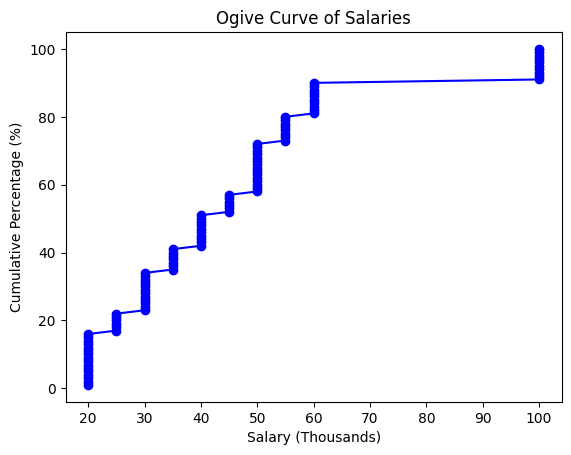

In [ ]:
sorted_salaries = np.sort(df5['Salaries (Thousands)'])
cumulative_freq = np.arange(1, len(sorted_salaries) + 1) / len(sorted_salaries) * 100

plt.plot(sorted_salaries, cumulative_freq, marker='o', color='b', linestyle='-', label='Ogive Curve')

plt.title('Ogive Curve of Salaries')
plt.xlabel('Salary (Thousands)')
plt.ylabel('Cumulative Percentage (%)')
plt.grid(False)
plt.show()